# Behavior Cloning

## Data Visualiation

#### Lesson 7: Training the Network
Grab images using csv.

In [8]:
import csv

In [9]:
lines = []
csv_file = '../../../Desktop/data/driving_log.csv'

with open(csv_file) as f:
    reader = csv.reader(f)
    for line in reader:
        lines.append(line)
# print(lines)

In [12]:
# Lesson 12 (Using Multiple Cameras)
with open(csv_file) as f:
    reader = csv.reader(f)
    for row in reader:
        steering_center = float(row[3])
        # print(steering_center)
        
        # create adjusted steering measurements for the side camera images
        correction = 0.2 # this is a parameter to tune
        steering_left = steering_center + correction
        steering_right = steering_center - correction
        
        # read in images from center, left and right cameras
        directory = '../../../Desktop/data/IMG/' # fill in the path to your training IMG diretory
        img_center = process_image(np.asarray(Image.open(path + row[0])))
        img_left = process_image(np.asarray(Image.open(path + row[1])))
        img_Right = process_image(np.asarray(Image.open(path + row[2])))
        
        # add images and angles to data set
        car_images.extend(img_center, img_left, img_right)
        steering_angles.extend(steering_center, steering_left, steering_right)

NameError: name 'process_image' is not defined

========================================================================

#### Toying with `pandas`

Grab csv and display.

In [3]:
import pandas as pd

In [4]:
xcl = pd.read_csv('../../../Desktop/data/driving_log.csv')

xcl.head()

,/Users/rudypena/Desktop/IMG/center_2017_03_02_18_08_22_977.jpg,/Users/rudypena/Desktop/IMG/left_2017_03_02_18_08_22_977.jpg,/Users/rudypena/Desktop/IMG/right_2017_03_02_18_08_22_977.jpg,0,0.1,0.2,1.254421E-06
0,/Users/rudypena/Desktop/IMG/center_2017_03_02_...,/Users/rudypena/Desktop/IMG/left_2017_03_02_18...,/Users/rudypena/Desktop/IMG/right_2017_03_02_1...,0.0,0.0,0.0,0.000002
1,/Users/rudypena/Desktop/IMG/center_2017_03_02_...,/Users/rudypena/Desktop/IMG/left_2017_03_02_18...,/Users/rudypena/Desktop/IMG/right_2017_03_02_1...,0.0,0.0,0.0,0.000003
2,/Users/rudypena/Desktop/IMG/center_2017_03_02_...,/Users/rudypena/Desktop/IMG/left_2017_03_02_18...,/Users/rudypena/Desktop/IMG/right_2017_03_02_1...,0.0,0.0,0.0,0.000004
3,/Users/rudypena/Desktop/IMG/center_2017_03_02_...,/Users/rudypena/Desktop/IMG/left_2017_03_02_18...,/Users/rudypena/Desktop/IMG/right_2017_03_02_1...,0.0,0.0,0.0,0.000002
4,/Users/rudypena/Desktop/IMG/center_2017_03_02_...,/Users/rudypena/Desktop/IMG/left_2017_03_02_18...,/Users/rudypena/Desktop/IMG/right_2017_03_02_1...,0.0,0.0,0.0,0.000002


========================================================================

#### Lesson 7: Training the Network (Continued..)

Create images, measurements arrays, which will then convert to numpy arrays (Keras requirement).

In [5]:
import cv2

images =  
measurements = []

for line in lines:
    # Lesson 12 (Using Multiple Cameras)
    for i in range(3):
        # line[0] grabs center images
        source_path = line[i]
        filename = source_path.split('/')[-1]
        current_path = '../../../Desktop/data/IMG/' + filename

        # Grab Image and append to list  
        image = cv2.imread(current_path)
        images.append(image)

        # Same with measurements
        measurement = float(line[3])
        measurements.append(measurement)

Next, we build the most basic neural network possible.

Just to verify everything is working. This network is going to be a flattened image connected to a single output node. This single output node will predict my steering angle which makes this a **regression network**. For a classification network, I might apply a softmax activation function to the output layer BUT, in a regression network like this, I just want the single output node to diretly predict the steering measurement. So at this time, we will not apply an activation function.

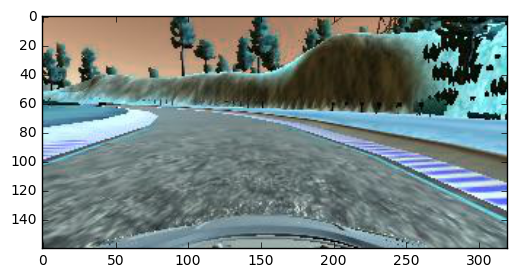

In [6]:
# Data Augmentation (Lesson 11)
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

import numpy as np

augmented_images, augmented_measurements = [], []

for image, measurement in zip(images, measurements):
    augmented_images.append(image)
    augmented_measurements.append(measurement)
    augmented_images.append(cv2.flip(image, 1))
    augmented_measurements.append(measurement*-1.0)

plt.imshow(images[0])

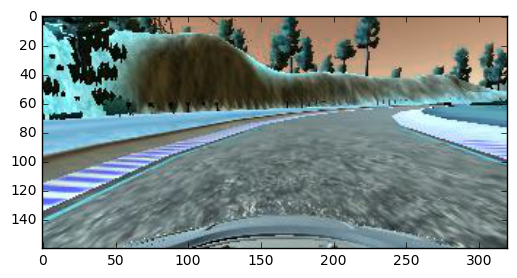

In [7]:
plt.imshow(cv2.flip(augmented_images[0], 1))

In [8]:
from keras.models import Sequential
from keras.layers import Activation, Flatten, Dense, Lambda, Cropping2D
from keras.layers.convolutional import Convolution2D
from keras.layers.pooling import MaxPooling2D

model = Sequential()

Using TensorFlow backend.


In [9]:
# Preprocessing the data (Lesson 9)
model.add(Lambda(lambda x: x / 255.0 - 0.5, input_shape=(160, 320, 3)))

In [10]:
# Lesson 13 (Cropping Images in Keras)
# 75 row pixels from top of the image
# 25 row pixels from the bottom of the image
# 0 columns of pixels from the left of the image
# 0 columns of pixels from the right of the image
model.add(Cropping2D(cropping=((70, 25), (0,0))))

In [11]:
# Lesson 10
model.add(Convolution2D(6, 5, 5, activation="relu"))
model.add(MaxPooling2D())
model.add(Convolution2D(6, 5, 5, activation="relu"))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(120))
model.add(Dense(84))
model.add(Dense(1))

# Original Attempt (Lesson 7 - 9)
# model.add(Flatten(input_shape=(160, 320, 3)))
# model.add(Dense(1))

With the network constructed, we can compile the model. For the loss function Ill use mean squared error (MSE). This si different than the cross entropy function we have used in the past. Again, because this is a regression network instead of a classification network.

What we wan to do is minimize the error between the steering measurement that the network predicts and the ground truth steering measurement. MSE is a good loss function for this.

Once the model is compiled, Ill train it with the feature and label arrays, we just built. We will also shuffle the data and split off 20% of the data to use for a validation set.

In [12]:
X_train = np.array(augmented_images)
y_train = np.array(augmented_measurements)

model.compile(loss='mse', optimizer='adam')
model.fit(X_train, y_train, validation_split=0.2, shuffle=True)

Train on 30556 samples, validate on 7640 samples
Epoch 1/10
30556/30556 [==============================] - 537s - loss: 0.0250 - val_loss: 0.0096
Epoch 2/10
30556/30556 [==============================] - 473s - loss: 0.0138 - val_loss: 0.0101
Epoch 3/10
30556/30556 [==============================] - 457s - loss: 0.0132 - val_loss: 0.0100
Epoch 4/10
30556/30556 [==============================] - 451s - loss: 0.0130 - val_loss: 0.0101
Epoch 5/10
30556/30556 [==============================] - 432s - loss: 0.0128 - val_loss: 0.0098
Epoch 6/10
30556/30556 [==============================] - 417s - loss: 0.0123 - val_loss: 0.0110
Epoch 7/10
30556/30556 [==============================] - 457s - loss: 0.0121 - val_loss: 0.0108
Epoch 8/10
30556/30556 [==============================] - 439s - loss: 0.0120 - val_loss: 0.0106
Epoch 9/10
30556/30556 [==============================] - 460s - loss: 0.0117 - val_loss: 0.0108
Epoch 10/10
30556/30556 [==============================] - 414s - loss: 0.0113

Finally we are going to save the train models so that later we can download it only my local machine and see if it works for driving the simulator.

In [14]:
model.save('model.h5')